<a href="https://colab.research.google.com/github/MichalBalcerak/ML24-25/blob/main/Homework02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D





# Generating data
- 250 observations from $\mathcal{N}\left( \left( \begin{array}{c} 0 \\ 0 \end{array} \right), \left(\begin{array}{cc} 0.3 & 0.2 \\ 0.2 & 0.3 \end{array}\right)\right)$
- 100 observations from $\mathcal{N}\left( \left( \begin{array}{c} 1.6 \\ -0.6 \end{array} \right), \left(\begin{array}{cc} 0.1 & 0 \\ 0 & 0.4 \end{array}\right)\right)$
- 100 observations from $\mathcal{N}\left( \left( \begin{array}{c} -0.8 \\ 1.4 \end{array} \right), \left(\begin{array}{cc} 0.2 & 0 \\ 0 & 02 \end{array}\right)\right)$

In [3]:
np.random.seed(0)

mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.3, 0.2],
                 [0.2,  0.3]])
data1 = np.random.multivariate_normal(mean1, cov1, 250)

mean2 = np.array([1.6, -0.6])
cov2 = np.array([[0.1, 0],
                 [0,  0.4]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

mean3 = np.array([-0.8, 1.4])
cov3 = np.array([[0.2, 0],
                 [0,  0.2]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)


# Data visualisation

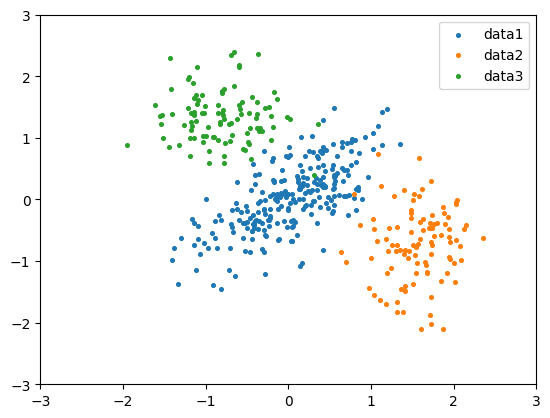

In [7]:
plt.scatter(data1[:,0], data1[:,1], marker='o', s=7, label = "data1")
plt.scatter(data2[:,0], data2[:,1], marker='o', s=7, label = "data2")
plt.scatter(data3[:,0], data3[:,1], marker='o', s=7, label = "data3")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend()
plt.show()

Let's start with following question: **If we didn't know the number of clusters in advance, how could we decide on a suitable  K  for the clustering algorithm?**\
The question is about how to choose number of clusters. I decided to use **Silhouette score** and **Calinski-Harabsz index** to evaluate quality of clasterization.
- Silhouette score was introduced in class.
- Calinski-Harabasz Index (CH) is defined as the ratio of the between-cluster sum of squares (BCSS) to the within-cluster sum of squares (WCSS), normalized by their number of degrees of freedom
$$ CH = \frac{BCSS/(k-1)}{WCSS/(n-k)} $$
k - number of clusters\
n - number of data points

High value of CH indicates a better clustering

In [ ]:
data_X = np.vstack([data1, data2, data3])

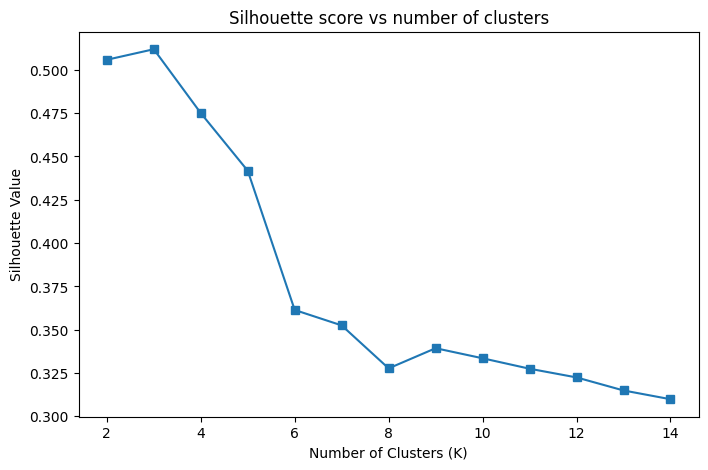

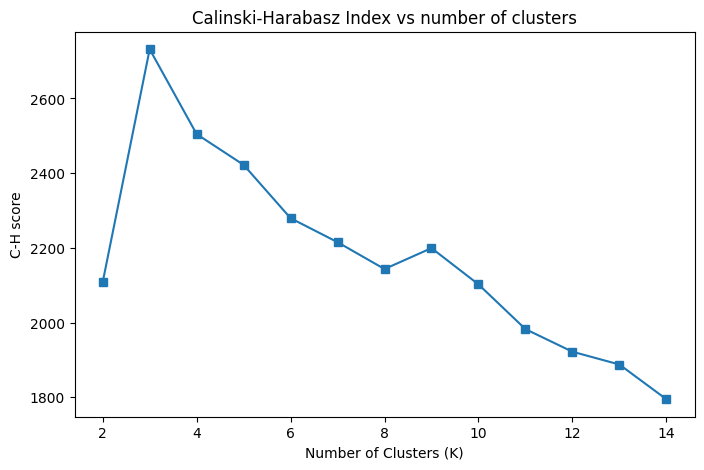

In [11]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture

K = range(2,15)
sil_scores = []
ch_scores = []
for k in K:
    model = GaussianMixture(n_components=k, random_state=0)
    model.fit(data_X)
    labels = model.predict(data_X)
    sil_scores.append(silhouette_score(data_X, labels))
    ch_scores.append(calinski_harabasz_score(data_X, labels))

plt.figure(figsize=(8, 5))
plt.plot(K, sil_scores, marker='s', linestyle='-', label='Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Value')
plt.title("Silhouette score vs number of clusters")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(K, ch_scores, marker='s', linestyle='-', label='Calinski-Harabasz Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('C-H score')
plt.title("Calinski-Harabasz Index vs number of clusters")
plt.show()

Both best silhouette score and CH index have been obtained for K=3 which is consistent with number of independent probability distribution from the data was drawn.

**How can we visualize the decision boundary for attributing a new (unlabeled) point to one of the GMM clusters?**